In [1]:
print("Hello, this is a test")

Hello, this is a test


In [2]:
import pandas as pd

In [3]:
# create a data frame for the Hou gene list
#hou = pd.read_csv("..\data\Hou_gene_list.csv")

# read in full marker file as Hou
hou = pd.read_csv("..\data\Hou_gene_list_full.csv")

# drop the empty columns
hou = hou.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
hou.head(10)

,cluster,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj
0,Superficial Epithelial,si:ch211-207n23.2,0.0,3.783526,0.983,0.256,0.0
1,Superficial Epithelial,zgc:111983,0.0,3.634558,0.987,0.295,0.0
2,Superficial Epithelial,CABZ01088053.1,0.0,3.398964,0.935,0.188,0.0
3,Superficial Epithelial,krt1-19d,0.0,3.254499,0.877,0.123,0.0
4,Superficial Epithelial,si:dkey-247k7.2,0.0,3.182882,0.961,0.117,0.0
5,Superficial Epithelial,cldne,0.0,3.068289,0.982,0.149,0.0
6,Superficial Epithelial,gig2l,0.0,3.018676,0.514,0.165,0.0
7,Superficial Epithelial,si:ch211-157c3.4,0.0,2.870359,0.983,0.268,0.0
8,Superficial Epithelial,CABZ01072255.2,0.0,2.858588,0.876,0.105,0.0
9,Superficial Epithelial,si:ch211-217k17.10,0.0,2.838415,0.886,0.096,0.0


In [4]:
#create a data frame for the Hartig gene list
hartig = pd.read_csv("..\data\Hartig_gene_list.csv")
hartig.head(10)

,GeneID,logFC,logCPM,LR,PValue,FDR,DiffExp,Symbol,Description,GeneType,...,CTRL_2dpa_3_TPM,TREAT_2dpa_1_TPM,TREAT_2dpa_2_TPM,TREAT_2dpa_3_TPM,CTRL_4dpa_1_TPM,CTRL_4dpa_2_TPM,CTRL_4dpa_3_TPM,TREAT_4dpa_1_TPM,TREAT_4dpa_2_TPM,TREAT_4dpa_3_TPM
0,ENSDARG00000105096,-6.495832,2.398769,47.430783,5.700000e-12,1.040000e-07,downregulated,si:ch1073-67j19.1,si:ch1073-67j19.1 [Source:ZFIN;Acc:ZDB-GENE-14...,protein_coding,...,1.696982,-0.138044,0.260336,-0.228501,-0.325886,-0.623223,-0.180988,0.246788,0.252641,0.241811
1,ENSDARG00000036292,-6.761098,2.685079,37.518610,9.050000e-10,8.280000e-06,downregulated,cdx4,caudal type homeobox 4 [Source:ZFIN;Acc:ZDB-GE...,protein_coding,...,2.241811,0.426511,-0.164697,-0.363015,0.231799,0.276254,0.071545,2.042324,0.447290,1.696982
2,ENSDARG00000103520,-6.446571,2.675062,36.043263,1.930000e-09,1.180000e-05,downregulated,BX005082.2,NaN,protein_coding,...,3.067691,0.771499,0.674114,-0.623223,-0.180988,1.246788,0.252641,1.241811,0.426511,1.420265
3,ENSDARG00000045671,-6.149764,2.634098,34.177625,5.030000e-09,2.300000e-05,downregulated,ifng1-1,"interferon, gamma 1-1 [Source:ZFIN;Acc:ZDB-GEN...",protein_coding,...,2.642658,0.636985,1.231799,0.276254,0.071545,0.457362,0.447290,1.696982,0.861956,1.845298
4,ENSDARG00000078731,-5.297894,2.172497,27.592737,1.500000e-07,5.477190e-04,downregulated,BX005336.3,NaN,protein_coding,...,1.861216,0.071545,0.457362,0.447290,0.112020,-0.138044,0.260336,0.771499,0.674114,0.376777
5,ENSDARG00000095026,-4.667588,2.418922,25.912473,3.570000e-07,1.088967e-03,downregulated,si:dkey-58f10.14,si:dkey-58f10.14 [Source:ZFIN;Acc:ZDB-GENE-060...,protein_coding,...,2.231799,1.276254,1.071545,1.457362,0.447290,1.112020,-0.138044,1.845298,-0.228501,1.259077
6,ENSDARG00000075791,-4.514841,2.348269,24.986063,5.770000e-07,1.508744e-03,downregulated,si:dkey-79f11.5,si:dkey-79f11.5 [Source:ZFIN;Acc:ZDB-GENE-0301...,protein_coding,...,2.988937,1.246788,1.252641,1.241811,-0.573489,-0.164697,-0.363015,0.231799,1.276254,1.656507
7,ENSDARG00000071012,-4.951097,2.083999,22.784758,1.810000e-06,4.142393e-03,downregulated,ifit14,interferon-induced protein with tetratricopept...,protein_coding,...,2.457362,0.447290,0.112020,-0.138044,0.260336,-0.228501,-0.325886,0.376777,-0.180988,1.246788
8,ENSDARG00000060566,-5.110833,2.230976,21.863601,2.930000e-06,5.948687e-03,downregulated,cluhb,clustered mitochondria (cluA/CLU1) homolog b [...,protein_coding,...,1.771499,-0.325886,-0.623223,-0.180988,0.246788,0.252641,0.241811,0.426511,0.835303,0.636985
9,ENSDARG00000042008,-4.786807,2.684332,21.455344,3.620000e-06,6.021493e-03,downregulated,BX936298.1,NaN,protein_coding,...,2.260336,0.771499,0.674114,0.376777,-0.180988,0.246788,0.252641,2.241811,1.426511,2.157231


In [5]:
# create a new data frame that contains only those rows that have matching values in both of the original data frames
# based on the 'gene' column in Hou and 'symbol' column in Hartig
merged_gene_list = pd.merge(left=hou, right=hartig, left_on='gene', right_on='Symbol')

# only include the listed columns: gene (Hou), symbol (Hartig), geneID, cluster, diffExp, avg_logFC (Hou), and logFC (Hartig)
merged_gene_list = merged_gene_list.loc[:, ['gene', 'Symbol', 'GeneID', 'cluster', 'DiffExp', 'avg_logFC', 'logFC']]
merged_gene_list.columns = ["gene_hou", "gene_hartig", "GeneID", "cluster", "DiffExp", "logFC_hou", "logFC_hartig"]
merged_gene_list

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
0,si:ch211-207n23.2,si:ch211-207n23.2,ENSDARG00000097157,Superficial Epithelial,none,3.783526,-2.015353
1,zgc:111983,zgc:111983,ENSDARG00000006588,Superficial Epithelial,none,3.634558,-0.618203
2,krt1-19d,krt1-19d,ENSDARG00000023082,Superficial Epithelial,none,3.254499,3.592442
3,si:dkey-247k7.2,si:dkey-247k7.2,ENSDARG00000103199,Superficial Epithelial,none,3.182882,-1.147063
4,cldne,cldne,ENSDARG00000043128,Superficial Epithelial,none,3.068289,-1.581959
...,...,...,...,...,...,...,...
1044,lsm6,lsm6,ENSDARG00000036995,Mesenchymal,none,0.650483,-1.498464
1045,cxcl12a,cxcl12a,ENSDARG00000037116,Mesenchymal,none,0.645527,0.069844
1046,cirbpb,cirbpb,ENSDARG00000013351,Mesenchymal,none,0.645116,-0.392708
1047,rbbp4,rbbp4,ENSDARG00000029058,Mesenchymal,none,0.644503,-1.840075


In [6]:
# count how many genes of each type of DiffExp are present in the merged gene list
counts = merged_gene_list.groupby('DiffExp')['DiffExp'].count()
counts

# there are 38 downregulated genes and 1011 non-differentially expressed genes

DiffExp
downregulated      38
none             1011
Name: DiffExp, dtype: int64

In [7]:
# create a dataframe of the differentially expressed genes that exist in both gene lists
downreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'downregulated']
downreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
5,gig2l,gig2l,ENSDARG00000091730,Superficial Epithelial,downregulated,3.018676,-8.514214
6,gig2l,gig2l,ENSDARG00000091730,Mucosal-like,downregulated,1.614395,-8.514214
51,zgc:152791,zgc:152791,ENSDARG00000039243,Superficial Epithelial,downregulated,1.486291,-5.231428
113,lgals3bpa,lgals3bpa,ENSDARG00000037805,Superficial Epithelial,downregulated,1.071215,-4.752018
181,rnf213a,rnf213a,ENSDARG00000099465,Superficial Epithelial,downregulated,0.750814,-3.983005
214,zgc:194655,zgc:194655,ENSDARG00000100942,Superficial Epithelial,downregulated,0.665518,-4.910327
265,si:ch211-71m22.1,si:ch211-71m22.1,ENSDARG00000058638,Mucosal-like,downregulated,0.595282,-6.891833
312,zgc:113425,zgc:113425,ENSDARG00000026616,Mucosal-like,downregulated,0.276705,-2.566707
348,gig2h,gig2h,ENSDARG00000103444,Mucosal-like,downregulated,0.534017,-6.955152
360,irf7,irf7,ENSDARG00000045661,Mucosal-like,downregulated,0.533854,-7.385670


In [8]:
# get a list of all the cell types to then parse the gene list into separate cell cluster dataframes
merged_gene_list.cluster.unique()

array(['Superficial Epithelial', 'Mucosal-like',
       'Intermediate Epithelial', 'Hematopoietic', 'Basal Epithelial',
       'Mesenchymal'], dtype=object)

In [9]:
from statsmodels import robust

In [10]:
superficial = merged_gene_list[merged_gene_list['cluster'] == "Superficial Epithelial"]
superficial_MAD = robust.mad(superficial.logFC_hartig)
ser = pd.Series(superficial_MAD, index = ['MAD'])
superficial_stats = superficial.logFC_hartig.describe()
superficial_stats = superficial_stats.append(ser)
superficial_stats

count    181.000000
mean      -0.287836
std        1.655434
min       -8.514214
25%       -0.817170
50%       -0.233228
75%        0.535095
max        4.201565
MAD        1.077113
dtype: float64

In [11]:
mucosal = merged_gene_list[merged_gene_list['cluster'] == "Mucosal-like"]
mucosal_MAD = robust.mad(mucosal.logFC_hartig)
ser = pd.Series(mucosal_MAD, index = ['MAD'])
mucosal_stats = mucosal.logFC_hartig.describe()
mucosal_stats = mucosal_stats.append(ser)
mucosal_stats

count    169.000000
mean      -0.755800
std        1.543351
min       -8.514214
25%       -1.393815
50%       -0.603544
75%        0.123697
max        3.367445
MAD        1.136380
dtype: float64

In [12]:
intermediate = merged_gene_list[merged_gene_list['cluster'] == "Intermediate Epithelial"]
intermediate_MAD = robust.mad(intermediate.logFC_hartig)
ser = pd.Series(intermediate_MAD, index = ['MAD'])
intermediate_stats = intermediate.logFC_hartig.describe()
intermediate_stats = intermediate_stats.append(ser)
intermediate_stats

count    155.000000
mean      -0.157247
std        1.405361
min       -7.731900
25%       -0.720322
50%       -0.129340
75%        0.808101
max        2.636492
MAD        1.088647
dtype: float64

In [13]:
basal = merged_gene_list[merged_gene_list['cluster'] == "Basal Epithelial"]
basal_MAD = robust.mad(basal.logFC_hartig)
ser = pd.Series(basal_MAD, index = ['MAD'])
basal_stats = basal.logFC_hartig.describe()
basal_stats = basal_stats.append(ser)
basal_stats

count    188.000000
mean       0.325237
std        0.863848
min       -2.433650
25%       -0.197845
50%        0.421837
75%        0.896150
max        2.952315
MAD        0.786545
dtype: float64

In [14]:
hema = merged_gene_list[merged_gene_list['cluster'] == "Hematopoietic"]
hema_MAD = robust.mad(hema.logFC_hartig)
ser = pd.Series(hema_MAD, index = ['MAD'])
hema_stats = hema.logFC_hartig.describe()
hema_stats = hema_stats.append(ser)
hema_stats

count    173.000000
mean      -1.553245
std        1.192524
min       -7.329802
25%       -2.129938
50%       -1.364175
75%       -0.758648
max        1.112360
MAD        0.961034
dtype: float64

In [15]:
mesenchymal = merged_gene_list[merged_gene_list['cluster'] == "Mesenchymal"]
mesenchymal_MAD = robust.mad(mesenchymal.logFC_hartig)
ser = pd.Series(mesenchymal_MAD, index = ['MAD'])
mesenchymal_stats = mesenchymal.logFC_hartig.describe()
mesenchymal_stats = mesenchymal_stats.append(ser)
mesenchymal_stats

count    183.000000
mean      -0.399315
std        1.082268
min       -4.956457
25%       -1.005145
50%       -0.342955
75%        0.359384
max        2.952315
MAD        1.006866
dtype: float64

In [16]:
import plotnine as p9

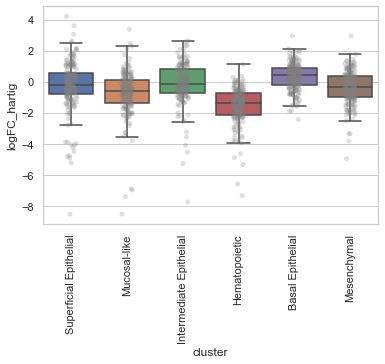

In [53]:
# box plot their distributions

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="cluster", y="logFC_hartig", data=merged_gene_list, showfliers = False)
ax = sns.stripplot(x="cluster", y="logFC_hartig", data=merged_gene_list, color="0.5", alpha=0.25)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig('sample.png', bbox_inches='tight')
plt.show()